# Notebook for visualizing data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns     #pour voir toutes les visulations possibles avec cette librairie, voir http://seaborn.pydata.org/api.html

In [2]:
def preco_features(df):
    features = df.drop(['Ventes'], axis=1)
    feature_names = list(features)
    return features, feature_names
    
def preco_target(df):
    target = pd.DataFrame(df['Ventes'])
    target_name = list(target)
    return target, target_name


In [3]:
df = pd.read_csv('BDD_Promo.csv', sep = ';')
df = df[df['Ventes'] > 0]
df = df [df['Type_Offre'] <= 20]
df = df.dropna()

_,feature_names = preco_features(df)
_,target_name = preco_target(df)

print('List of feature names:\n', feature_names, '\nTarget name:\n',target_name)             

List of feature names:
 ['Annee', 'Type_Offre', 'Code_Produit', 'Previ_Volume', 'Nb_Jours', 'S_debut', 'UB', 'Taux_Degradation', 'Magasin', 'VMH', 'Baseline_Magasin', 'Nb_Codes', 'Produit_Source'] 
Target name:
 ['Ventes']


In [4]:
# ------------- Description statistique du data set d'entrainement -------------
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Annee,307399.0,2017.748623,0.722506,2017.0,2017.000000,2018.000000,2018.000000,2019.000000
Type_Offre,307399.0,10.343349,2.509806,1.0,9.000000,10.000000,13.000000,14.000000
Code_Produit,307399.0,367.931265,588.538467,1.0,88.000000,208.000000,333.000000,2944.000000
Previ_Volume,307399.0,20.559674,36.235023,0.0,5.000000,10.000000,22.000000,813.000000
Nb_Jours,307399.0,10.720468,3.454132,6.0,9.000000,9.000000,16.000000,19.000000
S_debut,307399.0,22.857234,15.060600,0.0,9.000000,22.000000,37.000000,52.000000
UB,307399.0,15.423037,12.520515,1.0,7.000000,10.000000,26.000000,51.000000
Taux_Degradation,307399.0,23.648538,12.916628,0.0,25.000000,30.000000,33.000000,50.000000
Magasin,307399.0,108.367041,61.943211,1.0,55.000000,108.000000,162.000000,215.000000
VMH,307399.0,2811.520743,3544.283534,-375.0,1000.000000,1708.000000,3336.000000,133875.000000


/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


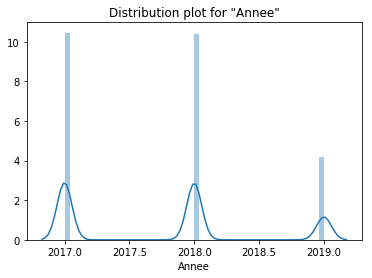

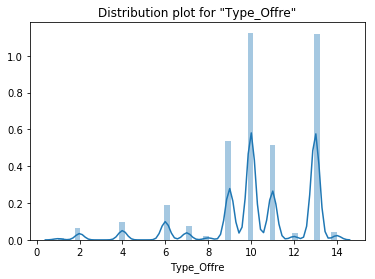

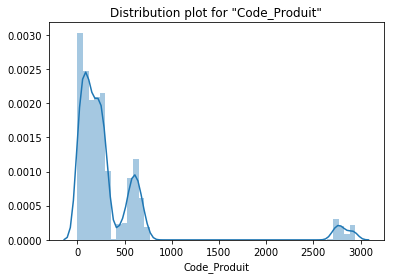

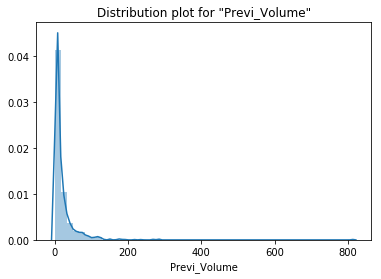

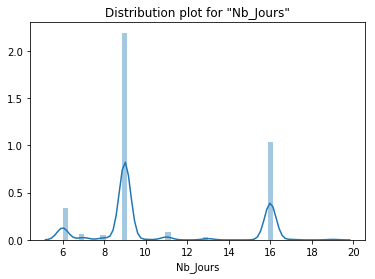

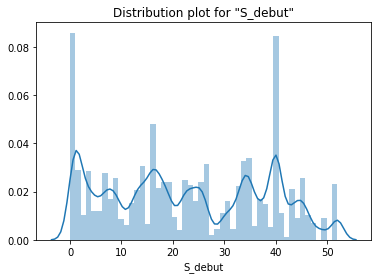

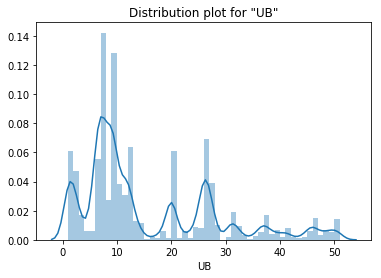

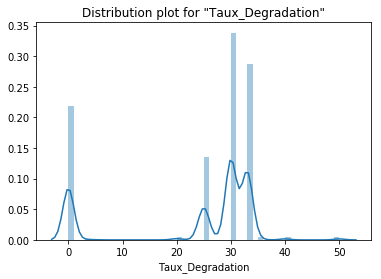

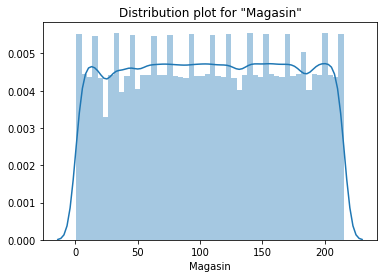

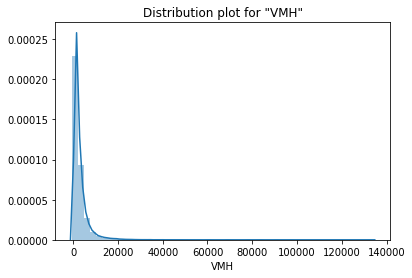

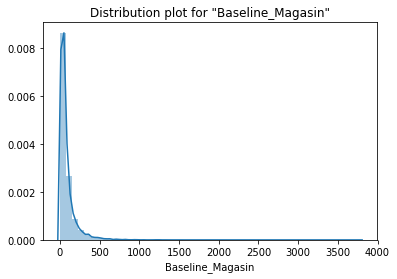

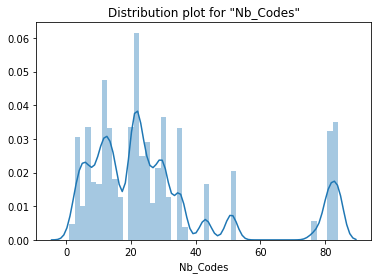

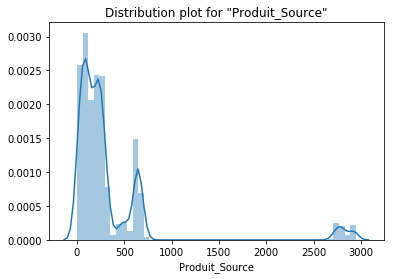

In [5]:
for i in feature_names:
    plt.title('Distribution plot for "'+i+'"')
    sns.distplot(df[i])
    plt.show()

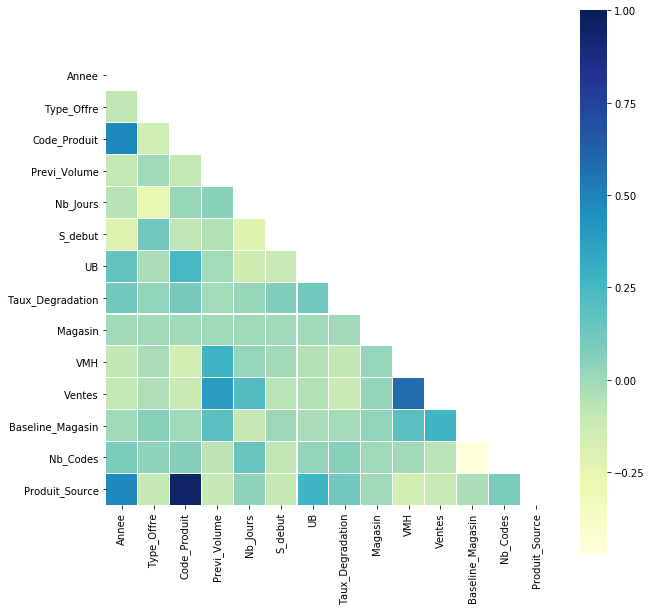

In [6]:
#Création d'un DataFrame pour faire l'analyse de correlation

data_corr = df.select_dtypes(exclude=['object'])    #On exclu tous les données catégoriques 
X_corr = data_corr.corr('pearson')
labels = X_corr.columns

#Maque pour n'afficher que la partie triangulaire inférieure de la matrice de correlation
mask = np.zeros_like(X_corr)
mask[np.triu_indices_from(mask)] = True

#plot heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(X_corr, 
            linewidths=.2,
            mask = mask,
            square=True,
            cmap="YlGnBu")

In [7]:
skewness = pd.DataFrame({'Skew':df.skew().sort_values(ascending = False).head(3)})
skewed_features = list(skewness.index)

for i in skewed_features:
    df[i+'²'] = df[i]**2    #On prend les features qui sont les plus skewed et on élève au carré pour normaliser le plus possible les valeurs

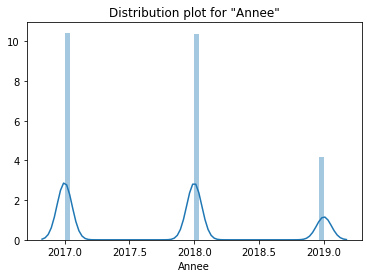

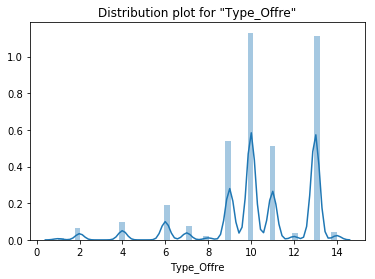

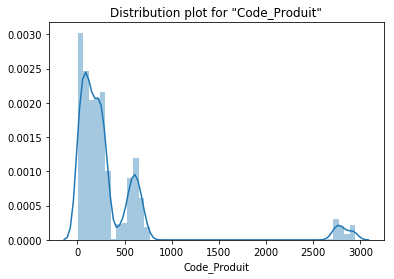

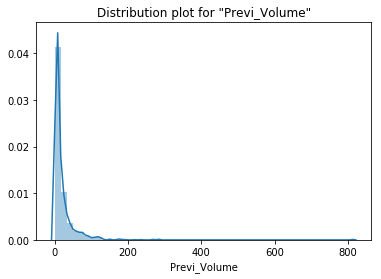

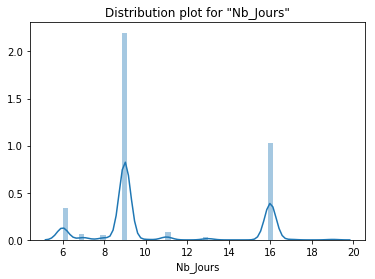

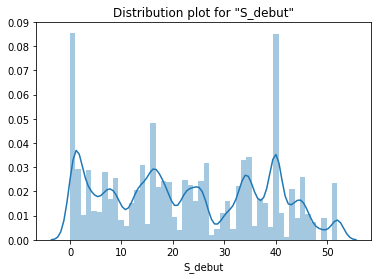

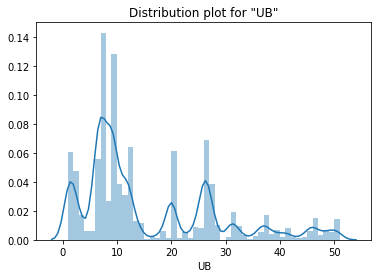

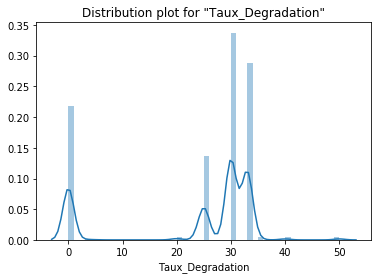

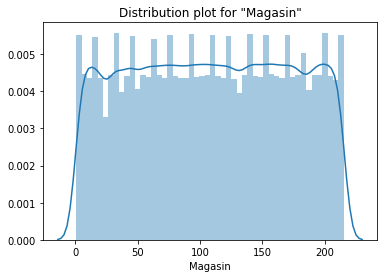

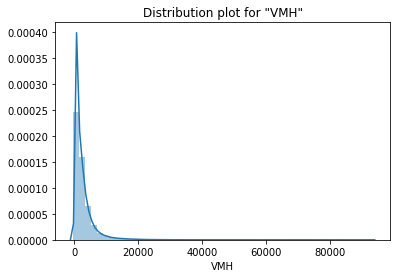

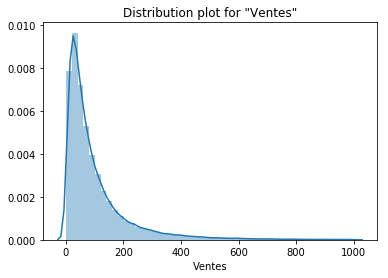

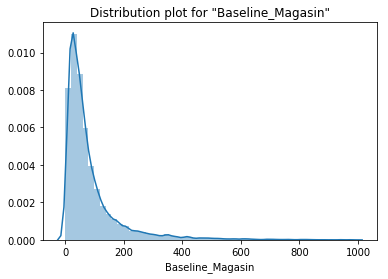

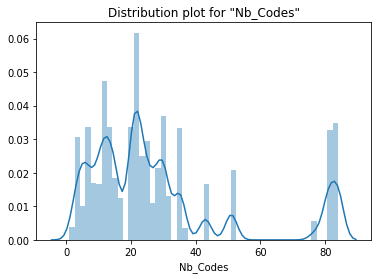

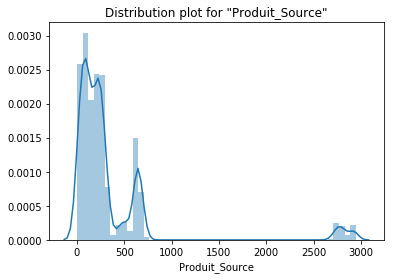

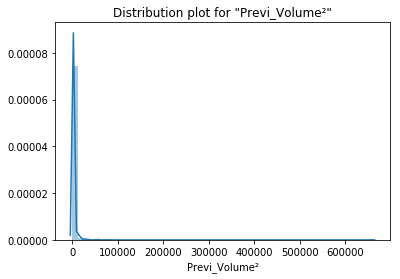

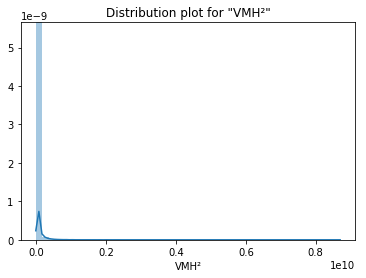

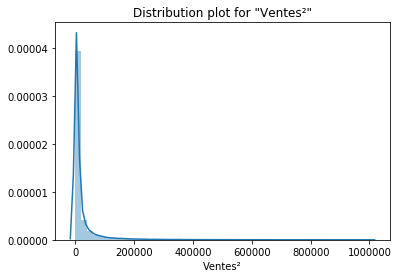

In [11]:
feature_names = list(df)

df = df[df['Ventes'] <= 1000]
df = df[df['Baseline_Magasin'] <=1000]

for i in feature_names:
    plt.title('Distribution plot for "'+i+'"')
    sns.distplot(df[i], hist=True)
    plt.show()
